In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bilayer_gap as bigap
import conductivity as cnd
from IPython.display import clear_output
from time import time as t
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import BilayerModes as bimo
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
def getinterBandModes(eigvals,eigvecs,ω,cutoff,indexrange=None,rounding=4):
    if indexrange==None:
        imin,imax = 0,-1
    else:
        imin,imax = indexrange
    eigvals = abs(eigvals[imin:imax,:])
    ω = ω[imin:imax]
    newvecs = eigvecs[imin:imax,...]
    indices = np.array(np.asarray(abs(eigvals)<cutoff).nonzero())
    for i in range(indices.shape[-1]):
        ind = indices[0,i]
        comp = indices[1,i]
        print(f"Eigenvalue {ind} at ω = {ω[ind]:.{rounding}g} is: ")
        print(f"{(eigvals[ind,comp]):.{rounding}g}")
        #mode1 = np.round(eigvecs[ind,:2,comp]+1j*eigvecs[ind,2:4,comp],rounding)
        mode = np.round(newvecs[ind,:,comp],rounding)
        #mode2 = np.round(eigvecs[ind,4:6,comp]+1j*eigvecs[ind,6:,comp],rounding)
        print(f"And the mode is: ")
        #print(f"{mode1[1]:{rounding}g}s + {mode1[0]:{rounding}g}d; {mode2[1]:{rounding}g}s + {mode2[0]:{rounding}g}d ")
        print(f"Band 1: {mode[1]:{rounding}g} s, {mode[0]:{rounding}g} d,{mode[3]:{rounding}g} is, {mode[2]:{rounding}g} id")
        print(f"Band 2: {mode[5]:{rounding}g} s, {mode[4]:{rounding}g} d,{mode[7]:{rounding}g} is, {mode[6]:{rounding}g} id")
        print()

#Values for Vd=0, supp=0.1, μ=-.2, J=.2:
ηs00 = 0.07225373077209239
ηs01 = 0.04981943372213484
#For supp=0.0:
ηs00_0 = 0.05975546306815633
ηs01_0 = 0.024093536601750228
#For μ=0, supp=0.1:
ηs00_1 = 0.05907577056411428
ηs01_1 = 0.05907577056411428

In [86]:
#prev = np.load("./multigapValues/symmetricGapvalues.npy")
ηs0 = np.ones(2)
ηd0 = np.ones(2)
Vs = 1
Vd = 1e-5
j = np.asarray(prev[0,:]==Vd).nonzero()[0][0]
ηs0 = prev[1:3,j+1]
ηd0 = prev[3:,j+1]
print(ηs0)
print(ηd0)
supp = 0.1
#Creating symmetric pairing matrices
Vsarr = Vs*np.array([
    [1,supp],
    [supp,1]
])
Vdarr = Vd*np.array([
    [1,supp],
    [supp,1]
])
T=0
ωc=10
μ=0
J=0.2
N=1200
q=0.001
ηs,ηd = bigap.findGap(Vsarr,Vdarr,J,η_s_in=ηs,η_d_in=ηd,ωc=ωc,N=N,μ=μ,qx=q,tol=1e-9,maxiter=20000,quiet=False)
print(ηs)
print(ηd)
fE = bigap.free_energy(Vsarr,Vdarr,J,ηs,1j*ηd,N=N,qx=q)
print(f"Free energy is {fE:}")

NameError: name 'prev' is not defined

In [122]:
print(prev[1:,j])
prev[1:3,j]=ηs
prev[3:,j]=ηd
#np.save("./multigapValues/symmetricGapvalues",prev)

[5.90757649e-02 5.90757649e-02 1.98510583e-05 1.98510583e-05]


In [46]:
ηd0 =(0.5+0.5j)*np.ones(2)
ηs0 = np.ones(2)
N=600
s=t()
#ηpre = np.loadtxt(f"./multigapValues/{Vs},{Vd},{supp},{J},{ωc},{N},{μ},{q},tol=1e-9(complex).txt",dtype=complex)
ηdc,ηsc = bigap.findGapComplex(Vsarr,Vdarr,J,ωc=ωc,η_s_in=ηsc,η_d_in=ηdc,N=N,μ=μ,qx=q,tol=1e-9,maxiter=10000,quiet=False)
ηdc_alt, ηsc_alt = bigap.findGapComplex(Vsarr,Vdarr,J,ωc=ωc,η_d_in=np.ones(2),N=N,μ=μ,qx=q,tol=1e-9,maxiter=10000,quiet=False)
e=t()
print(f"Took {e-s} seconds")
print(ηsc*ηsc.conj()/abs(ηsc))
print(ηdc*ηsc.conj()/abs(ηsc))
print()
print(ηsc_alt)
print(ηdc_alt)
fE2= bigap.free_energy(Vsarr,Vdarr,J,ηsc,ηdc,N=1200,qx=q)
print(f"Free energy is {fE2}")
fEs = bigap.free_energy(Vsarr,Vdarr,J,ηsc_alt,ηdc_alt,N=1200,qx=q)
print(f"Pure s-wave energy is {fEs}")

Maximal difference is 1.2355748695014324e-08, max gap is 0.05907580539868929
Maximal difference is 9.29689109724352e-09, max gap is 0.059075796101798195
Maximal difference is 6.9953016712531735e-09, max gap is 0.059075789106496523
Maximal difference is 5.26350650564833e-09, max gap is 0.059075783842990066
Maximal difference is 3.9604441740004326e-09, max gap is 0.05907577988254589
Maximal difference is 2.9799752526704637e-09, max gap is 0.05907577690257064
Maximal difference is 2.2422365006380396e-09, max gap is 0.05907577466033425
Maximal difference is 1.687136270966949e-09, max gap is 0.05907577297319798
Maximal difference is 1.2694597525952922e-09, max gap is 0.05907577170373823
Maximal difference is 9.55185458506591e-10, max gap is 0.05907577074855277
Converged after 60 iterations
Took 3.167236566543579 seconds
[0.05907577-2.36667010e-19j 0.05907577-6.55063001e-20j]
[-7.5914899e-08+3.60175079e-09j  7.5914899e-08+3.60175078e-09j]

[0.05907577 0.05907577]
[-7.59145813e-08  7.59152168

In [86]:
#Save current gap-values to a file, with parameters in the filename
filestring = f"./multigapValues/{Vs},{Vd},{supp},{J},{ωc},{1200},{μ},{q},tol=1e-9(complex).txt"
print(filestring)
#Order will be ηs1,ηs2,ηd1,ηd2
dat = np.concatenate((ηs,ηd))
#np.savetxt(filestring,dat)

./multigapValues/1,0.9705,0.0,0.2,10,1200,-0.2,0.001,tol=1e-9(complex).txt


In [147]:
#Import gapdata for the chosen parameters
gapdata = np.load("./multigapValues/μ=-0.2,J=0.2,supp=0.1,N=1200,tol=1e-9.npy")
#gapdata = np.load("./multigapValues/μ=0,J=0.2,supp=0.1,N=1200,tol=1e-9.npy")
Vs = 1
Vd = 1.105
supp = 0.1
#Creating symmetric pairing matrices
Vsarr = Vs*np.array([
    [1,supp],
    [supp,1]
])
Vdarr = Vd*np.array([
    [1,supp],
    [supp,1]
])
T=0
ωc=10
μ=-0.2
J=0.2
N=1600
q=0.001
if Vd>0.9:
    index = np.asarray(abs(gapdata[0])==Vd).nonzero()[0][0]
    ηs = gapdata[1:3,index]
    ηd = gapdata[3:,index]
else:
    ηs=gapdata[1:3,0]
    ηd=gapdata[3:,0]
#If the spectrum doesn't show the NG mode correctly for the previously calculated gap-values, calculate 
#them again for higher precision and a finer grid:
#ηs,ηd =bigap.findGap(Vsarr,Vdarr,J,ωc=ωc,η_s_in=ηs,η_d_in=ηd,N=N,μ=μ,qx=q,tol=1e-10,maxiter=10000,quiet=False)
print(f"V_d = {Vd}")
print(ηs)
print(ηd)
print(abs(2*ηs/ηs00))
#np.save("./multigapValues/μ=-0.2,J=0.2,supp=0.1,N=1200,tol=1e-9",gapdata)

V_d = 1.105
[0.03553983-0.00459978j 0.03068645-0.00397157j]
[0.00821395+0.06346408j 0.00413402+0.03194076j]
[0.99195606 0.85649244]


In [148]:
#Calculate optical response and everything else for chosen parameters and gap.
#First, use continuous distribution of frequencies with smaller N,Nω
#Then, use larger N,Nω and focus frequencies on relevant intervals as seen from previous calculation
ωmax = 2.25*ηs00_1
N=7200
cutoff = 2*ηs00_1
Nω=50
#ωarray = np.concatenate((
#    np.linspace(cutoff,0.5*ηs00,100,endpoint=False),
#    np.linspace(0.5*ηs00,1*ηs00,Nω-200,endpoint=False),
#    np.linspace(1*ηs00,ωmax,100)))
ωarray=np.linspace(cutoff,ωmax,Nω)#Continuous distribution of frequencies, less efficient (but less biased)
ωarray = ηs00*np.concatenate((
    np.linspace(0.85,0.86,40,endpoint=False),np.linspace(0.86,1.3,60)))
s=t()
bare,coll,VeffInv,Q,Qm = cnd.σ_bilayer(Vsarr,Vdarr,ηs,ηd,ωarray,N=N,J=J,T=T,reg=1e-4j,qx=q,μ=μ,ωc=ωc)
e=t()
print(f"Took {e-s:.2f} seconds")

Interpreting ηs,ηd as complex amplitudes!
Momentum interval 1 of 1037
Momentum interval 2 of 1037
Momentum interval 3 of 1037
Momentum interval 4 of 1037
Momentum interval 5 of 1037
Momentum interval 6 of 1037
Momentum interval 7 of 1037
Momentum interval 8 of 1037
Momentum interval 9 of 1037
Momentum interval 10 of 1037
Momentum interval 11 of 1037
Momentum interval 12 of 1037
Momentum interval 13 of 1037
Momentum interval 14 of 1037
Momentum interval 15 of 1037
Momentum interval 16 of 1037
Momentum interval 17 of 1037
Momentum interval 18 of 1037
Momentum interval 19 of 1037
Momentum interval 20 of 1037
Momentum interval 21 of 1037
Momentum interval 22 of 1037
Momentum interval 23 of 1037
Momentum interval 24 of 1037
Momentum interval 25 of 1037
Momentum interval 26 of 1037
Momentum interval 27 of 1037
Momentum interval 28 of 1037
Momentum interval 29 of 1037
Momentum interval 30 of 1037
Momentum interval 31 of 1037
Momentum interval 32 of 1037
Momentum interval 33 of 1037
Momentum i

1.2328813559322034


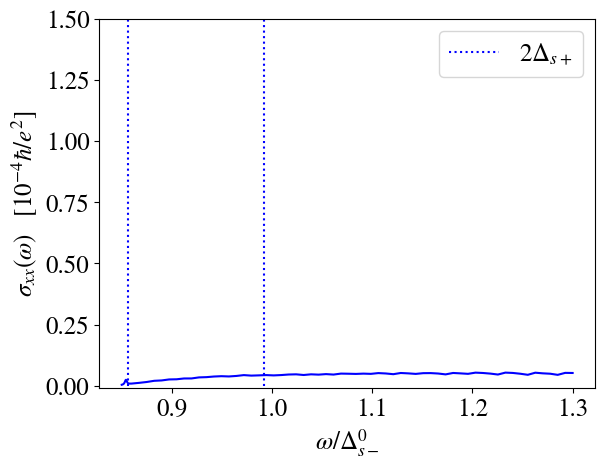

In [150]:
σ1 = bare[:,0,0]
σ2 = coll[:,0,0]
plt.plot(ωarray/ηs00,(σ1+σ2)*1e4,c="b")
plt.plot([2*abs(ηs[1])/ηs00]*2,[0,10000],c="b",linestyle="dotted",label="$2\\Delta_{s+}$")
plt.plot([2*abs(ηs[0])/ηs00]*2,[0,10000],c="b",linestyle="dotted")
plt.ylim((-0.01,1.5))
#np.save(f"./multigapConductivity/μ={μ},J={J},supp={supp}/σ,N={N},Vd={Vd}",σ1+σ2)
#np.save(f"./multigapConductivity/μ={μ},J={J},supp={supp}/VeffInv,N={N},Vd={Vd}",VeffInv)
#np.save(f"./multigapConductivity/μ={μ},J={J},supp={supp}/Q,N={N},Vd={Vd}",Q)
#np.save(f"./multigapConductivity/μ={μ},J={J},supp={supp}/Qm,N={N},Vd={Vd}",Qm)
#np.save(f"./multigapConductivity/μ={μ},J={J},supp={supp}/ω,N={N},Vd={Vd}",ωarray)
#plt.xlim((1.25,1.5))
plt.ylabel("$\\sigma_{xx}(\\omega)\\quad[10^{-4}\\hbar/e^2]$")
plt.xlabel("$\\omega/\\Delta_{s-}^0$")
plt.legend()

#plt.xlim(0.9,1.2)
print(ωarray[np.argmax(σ1+σ2)]/ηs00)
#plt.savefig("./Plots/multibandConductivityVd=0,μ=-0.2.pdf",bbox_inches='tight')

In [175]:
σ_old = np.load(f"./multigapConductivity/μ={μ},J={J},supp={supp}/σ,N={4800},Vd={Vd}.npy")
Q_old = np.load(f"./multigapConductivity/μ={μ},J={J},supp={supp}/Q,N={4800},Vd={Vd}.npy")
Qm_old = np.load(f"./multigapConductivity/μ={μ},J={J},supp={supp}/Qm,N={4800},Vd={Vd}.npy")
ω_old = np.load(f"./multigapConductivity/μ={μ},J={J},supp={supp}/ω,N={4800},Vd={Vd}.npy")
VeffInv_old = np.load(f"./multigapConductivity/μ={μ},J={J},supp={supp}/VeffInv,N={4800},Vd={Vd}.npy")
print(ω_old[-1]/ηs00)
print(ω_old[520]/ηs00)
print(ω_old[723]/ηs00)
print(Vd)
σnew = np.concatenate((σ_old[:520],σ1+σ2,σ_old[724:]),axis=0)
Qnew = np.concatenate((Q_old[:520],Q,Q_old[724:]),axis=0)
Qmnew = np.concatenate((Qm_old[:520],Qm,Qm_old[724:]),axis=0)
ωnew = np.concatenate((ω_old[:520],ωarray,ω_old[724:]),axis=0)
VeffInvnew = np.concatenate((VeffInv_old[:520],VeffInv,VeffInv_old[724:]),axis=0)
#np.save(f"./multigapConductivity/μ={μ},J={J},supp={supp}/σ,N={4800},Vd={Vd}.npy",σnew)
#np.save(f"./multigapConductivity/μ={μ},J={J},supp={supp}/Q,N={4800},Vd={Vd}.npy",Qnew)
#np.save(f"./multigapConductivity/μ={μ},J={J},supp={supp}/Qm,N={4800},Vd={Vd}.npy",Qmnew)
#np.save(f"./multigapConductivity/μ={μ},J={J},supp={supp}/ω,N={4800},Vd={Vd}.npy",ωnew)
#np.save(f"./multigapConductivity/μ={μ},J={J},supp={supp}/VeffInv,N={4800},Vd={Vd}.npy",VeffInvnew)
print(VeffInvnew.shape)

2.25
0.8500000000000001
1.2904040404040404
1.105
(696, 8, 8)


(0.0, 0.001)

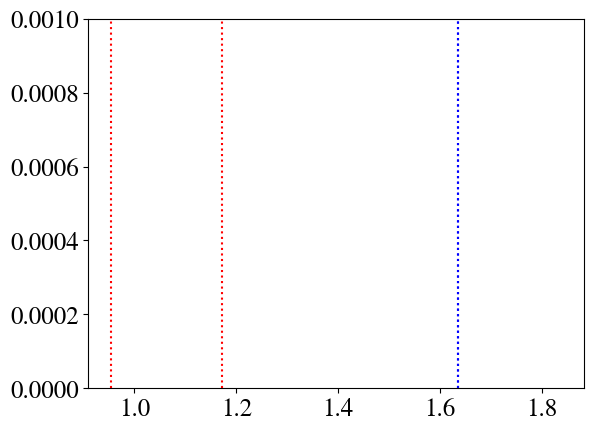

In [21]:
λ,modes = np.linalg.eig(VeffInv)
m1 = 0.954*ηs00
m2 = 1.171*ηs00
plt.plot([m1/ηs00]*2,[0,1],c="r",linestyle="dotted")
plt.plot([m2/ηs00]*2,[0,1],c="r",linestyle="dotted")
plt.plot([2*abs(ηs[1])/ηs00]*2,[0,10000],c="b",linestyle="dotted")
plt.plot([2*abs(ηs[0])/ηs00]*2,[0,100],c="b",linestyle="dotted")
plt.plot(ωarray/ηs00,abs(λ),linestyle="None",marker=".",markersize="1",c="black")

plt.ylim(0,1e-3)
#plt.xlim(.9,1.2)
#gapdata[1:3,index]=ηs
#gapdata[3:,index]=ηd
#np.save("./multigapValues/μ=0,J=0.2,supp=0.1,N=1200,tol=1e-9.npy",gapdata)


In [23]:
low = 400
up = low+20
print(f"Checking frequencies from {ωarray[low]/ηs00:.3f} to {ωarray[up]/ηs00:.3f}")
getinterBandModes(λ,modes,ωarray/ηs00,cutoff=1e-3,indexrange=(low,up),rounding=4)

Checking frequencies from 1.127 to 1.183
Eigenvalue 12 at ω = 1.161 is: 
0.0008827
And the mode is: 
Band 1: 0.0001+0.0115j s, 0+0j d,0.8234+0j is, -0-0j id
Band 2: 0.0003+0.0392j s, 0-0j d,-0.566+0.0034j is, 0+0j id



In [1019]:
m = bimo.symmetricModes(Vsarr,Vdarr,ηs,ηd,N=200,J=J,qx=q,μ=μ,ωc=ωc)
print(m/ηs00_1)

Momentum interval 1 of 1
Momentum interval 1 of 1
[0.01988126 0.50726636 1.44363652]


In [ ]:
Q_copy = np.copy(band1[-2])
Qm_copy = np.copy(band1[-1])
supp = [] #Choosing which components to suppress: (d,s,id,is) (suppressing in both bands)
for comp in supp:
    Q_copy[:,:,[comp]]*=0
    Qm_copy[:,:,[comp]]*=0
σ_suppressed = cnd.collective_σ(band1[1],Q_copy,Qm_copy,ωarray)[:,0,0]
plt.plot(ωarray/ηs[0],σ_suppressed*1e4)

In [78]:
###Phase diagram: Using Vs=1, μ=-.2,J=.2 and supp=.1:
Nd=147
dwave = np.linspace(1,1.147,Nd,endpoint=False)
T=0
ωc=10
μ=-0.2
J=0.2
N=1200
q=0.001
Vs = 1
supp = 0.1
η0 = np.loadtxt(f"./multigapValues/{Vs},{0},{supp},{J},{ωc},{N},{μ},{q},tol=1e-9(real).txt",dtype=complex)
res=[η0]

#Creating symmetric pairing matrix
arr = np.array([
    [1,supp],
    [supp,1]
])
for j,vd in enumerate(dwave):
    print(f"{j+1}'th iteration out of {Nd}...")
    try:
        previous = np.loadtxt(f"./multigapValues/{Vs},{vd},{supp},{J},{ωc},{N},{μ},{q},tol=1e-9(complex).txt",dtype=complex)
        print("Previous solution found, using that one.")
        ηsin = previous[:2]
        ηdin = previous[2:]
    except FileNotFoundError:
        print("Calculating manually, starting from last solution.")
        ηsin = res[-1][:2]
        ηdin = res[-1][2:]
    clear_output(wait=True)
    ηd,ηs = bigap.findGapComplex(Vs*arr,vd*arr,J,η_s_in=ηsin,η_d_in=ηdin,ωc=ωc,N=N,μ=μ,qx=q,tol=1e-9,maxiter=10000,quiet=True)
    print(ηs,ηd)
    η=np.concatenate((ηs,ηd))
    np.savetxt(f"./multigapValues/{Vs},{vd},{supp},{J},{ωc},{N},{μ},{q},tol=1e-9(auto).txt",η)
    res.append(η)
res=np.array(res)

Converged after 309 iterations
[0.01994592-0.00274267j 0.01873715-0.0025764j ] [0.01030872+0.0749689j  0.00573362+0.04169695j]


In [86]:
dat = np.loadtxt("./multigapValues/μ=-0.2,J=0.2,supp=0.1,N=1200,tol=1e-9.txt"
                                 ,dtype=complex).transpose()[:,48:]

dwavenew = np.concatenate((np.array([0]),dwave))
newdata = np.concatenate((dwavenew[None,:],res.transpose()),axis=0)
alldata = np.concatenate((newdata,dat),axis=1)
alldata.shape

(5, 251)

0.0


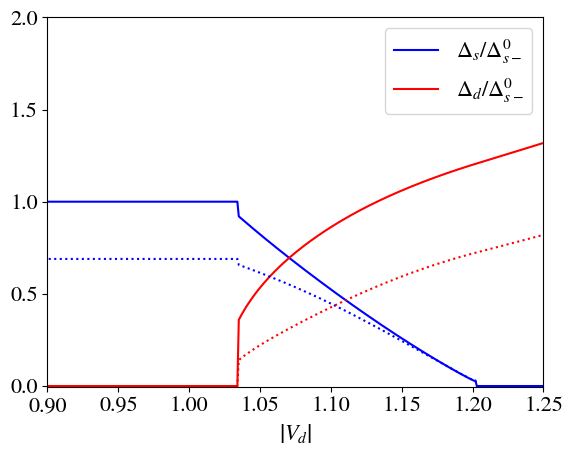

In [99]:
##Discontinuous phase diagram for supp=.1
dwave,ηs1,ηs2,ηd1,ηd2=np.loadtxt("./multigapValues/μ=-0.2,J=0.2,supp=0.1,N=1200,tol=1e-9.txt"
                                 ,dtype=complex)
#dwave,ηs1,ηs2,ηd1,ηd2 = alldata
#disc=0
print(abs(dwave[disc]))
plt.plot(abs(dwave[:disc]),abs(ηs1[:disc])/ηs00,label="$\\Delta_s/\\Delta_{s-}^0$",c="blue")
plt.plot(abs(dwave[:disc]),abs(ηd1[:disc])/ηs00,label="$\\Delta_d/\\Delta_{s-}^0$",c="red")
plt.plot(abs(dwave[:disc]),abs(ηs2[:disc])/ηs00,linestyle="dotted",c="blue")
plt.plot(abs(dwave[:disc]),abs(ηd2[:disc])/ηs00,linestyle="dotted",c="red")

plt.plot(abs(dwave[disc:]),abs(ηs1[disc:])/ηs00,c="blue")
plt.plot(abs(dwave[disc:]),abs(ηd1[disc:])/ηs00,c="red")
plt.plot(abs(dwave[disc:]),abs(ηs2[disc:])/ηs00,linestyle="dotted",c="blue")
plt.plot(abs(dwave[disc:]),abs(ηd2[disc:])/ηs00,linestyle="dotted",c="red")
plt.ylim(-0.005,2)
plt.xlim((0.9,1.25))
plt.legend()
plt.xlabel("$\\left|V_d\\right|$")
#plt.savefig("./Plots/multibandPhasediagram.pdf",bbox_inches='tight')

In [96]:
#np.savetxt("./multigapValues/μ=-0.2,J=0.2,supp=0.1,N=1200,tol=1e-9.txt",alldata)

In [186]:
#continuous phase diagram for supp=0:
import square_gap as sgap
#dat = np.loadtxt("gapvalues.txt").transpose()
T=0
ωc=10
μ=0
J=0.2
N=1200
q=0.001
Vs = 1
supp = 0.0
#Creating symmetric pairing matrix
η2res = []
for j,vd in enumerate(dwave):
    print(f"{j+1}'th iteration out of {Nd}...")
    print("Calculating manually, starting from last solution.")
    clear_output(wait=True)
    if vd<1.16:
        ηs0 = ηs01_0
        ηd0 = 0
    else:
        ηs0 = 1
        ηd0 = 1
    ηs,ηd = sgap.findGapVeryFast(Vs,vd,ωc=ωc,N=300,μ=μ-J,qx=q,tol=1e-9,η_s_in = ηs0, η_d_in = ηd0,maxiter=5000,quiet=True)
    ηs,ηd = sgap.findGapVeryFast(Vs,vd,ωc=ωc,N=600,μ=μ-J,qx=q,tol=1e-9,η_s_in = ηs, η_d_in = ηd,maxiter=5000,quiet=True)
    ηs,ηd = sgap.findGapVeryFast(Vs,vd,ωc=ωc,N=N,μ=μ-J,qx=q,tol=1e-9,η_s_in = ηs, η_d_in = ηd,maxiter=5000,quiet=True)
    print(vd)
    print(ηs,ηd)
    η=[ηs,ηd]
    η2res.append(η)
η2res = np.array(ηsres).transpose()
dat = np.concatenate((dat,η2res),axis=0)

Didn't converge, returning last value.
Converged after 655 iterations
Converged after 428 iterations
1.25
0.0068459464532516934 0.028735394418047098


NameError: name 'ηsres' is not defined

In [189]:
η2res = np.array(η2res).transpose()
dat = np.concatenate((dwave[None,:],η2res),axis=0)
#np.savetxt("gapvalues(μ=-0.4).txt",dat)

Text(0.5, 0, '$\\left|V_d\\right|$')

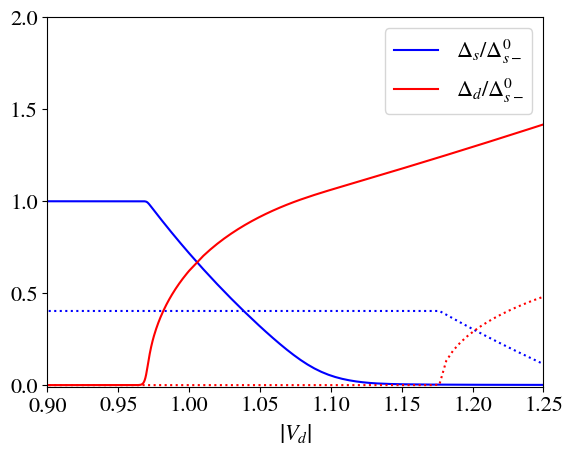

In [139]:
dwave,ηs1,ηd1 = np.loadtxt("gapvalues.txt").transpose()
dwave,ηs2,ηd2 = np.loadtxt("gapvalues(μ=-0.4).txt")
plt.plot(dwave,ηs1/ηs00_0,c="b",label="$\\Delta_s/\\Delta_{s-}^0$")
plt.plot(dwave,ηs2/ηs00_0,c="b",linestyle="dotted")
plt.plot(dwave,ηd1/ηs00_0,c="r",label="$\\Delta_d/\\Delta_{s-}^0$")
plt.plot(dwave,ηd2/ηs00_0,c="r",linestyle="dotted")
plt.xlim((0.9,1.25))
plt.ylim((-0.01,2))
plt.legend()
plt.xlabel("$\\left|V_d\\right|$")
#plt.savefig("./Plots/multibandPhasediagramNocoupling.pdf",bbox_inches='tight')

In [2]:
#finding the phase diagram for μ=0:
T=0
ωc=10
μ=0
J=0.2
N=1200
q=0.001
Vs = 1
supp = 0.1
dwave = np.linspace(0.9,1.25,350,endpoint=False)
ηres = []
arr = np.array([
    [1,supp],
    [supp,1]
])
for j,vd in enumerate(dwave):
    print(f"{j+1}'th iteration out of {350}...")
    print("Calculating manually, starting from last solution.")
    if vd<=1.074:
        ηs0 = np.array([ηs00_1,ηs01_1])
        ηd0 = 1e-8*np.ones(2)
        ηs,ηd = bigap.findGap(Vs*arr,vd*arr,J,ωc=ωc,N=N,μ=μ,qx=q,tol=1e-9,η_s_in = ηs0, η_d_in = ηd0,maxiter=10000,quiet=True)
    else:
        ηs0 = np.ones(2)
        ηd0 = np.ones(2)
        ηs,ηd = bigap.findGap(Vs*arr,vd*arr,J,ωc=ωc,N=200,μ=μ,qx=q,tol=1e-9,η_s_in = ηs0, η_d_in = ηd0,maxiter=20000,quiet=True)
        ηs,ηd = bigap.findGap(Vs*arr,vd*arr,J,ωc=ωc,N=600,μ=μ,qx=q,tol=1e-9,η_s_in = ηs, η_d_in = ηd,maxiter=5000,quiet=True)
        ηs,ηd = bigap.findGap(Vs*arr,vd*arr,J,ωc=ωc,N=N,μ=μ,qx=q,tol=1e-9,η_s_in = ηs, η_d_in = ηd,maxiter=1000,quiet=True)
    clear_output(wait=True)
    print(vd)
    print(ηs,ηd)
    η=np.concatenate((ηs,ηd))
    ηres.append(η)
ηres=np.array(ηres)

1.249
[7.35191266e-09 7.35191266e-09] [0.08106247 0.08106247]


In [7]:
dat = np.concatenate((dwave[None,:],ηres.transpose()))
#np.save("./multigapValues/symmetricGapvalues",dat)

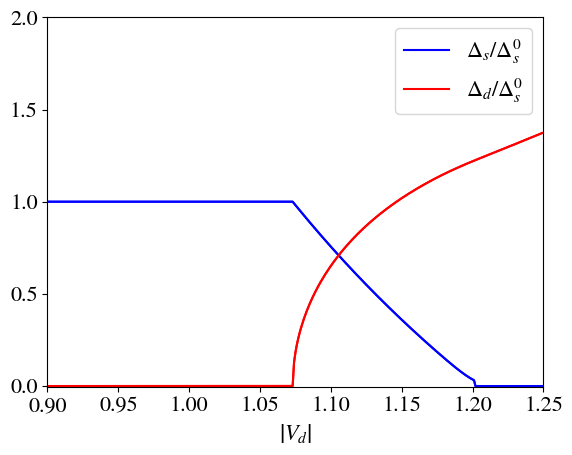

In [138]:
symmDat = np.load("./multigapValues/symmetricGapvalues.npy")
plt.plot(symmDat[0,:],symmDat[1,:].transpose()/ηs00_1,color="blue",label="$\\Delta_s/\\Delta_{s}^0$")
plt.plot(symmDat[0,:],symmDat[2,:].transpose()/ηs00_1,color="blue")
plt.plot(symmDat[0,:],symmDat[3,:].transpose()/ηs00_1,color="red",label="$\\Delta_d/\\Delta_{s}^0$")
plt.plot(symmDat[0,:],symmDat[4,:].transpose()/ηs00_1,color="red")
plt.xlim((.9,1.25))
plt.ylim((-.005,2))
plt.xlabel("$\\left|V_d\\right|$")
plt.legend()
#plt.savefig("./Plots/multibandPhasediagramSymmetric.pdf",bbox_inches='tight')

In [74]:
###Finding the mode spectrum for μ=-0.2,J=0.2,supp=0.1
μ=-.2
J=.2
supp=.1
q=0.001
Vs=1
ωc=20
arr = np.array([
    [1,supp],
    [supp,1]
])
gapdata = np.loadtxt("./multigapValues/μ=-0.2,J=0.2,supp=0.1,N=1200,tol=1e-9.txt",dtype=complex)
dwave = abs(gapdata[0])
dwave = np.concatenate((np.linspace(0,1,200,endpoint=False),dwave[1:]))
dwave[0]+=1e-10
newspectrum =[]
for vd in dwave[235:]:
    print(f"V_d ={vd}")
    if vd>=1:
        index = np.asarray(abs(gapdata[0])==vd).nonzero()[0][0]
        ηs = gapdata[1:3,index]
        ηd = gapdata[3:,index]
    else:
        ηs=gapdata[1:3,0]
        ηd=gapdata[3:,0]
    if np.iscomplex(ηs).any():
        freq = bimo.sidModes(Vs*arr,vd*arr,ηs,ηd,N=200,reg=1e-4j,qx=q,μ=μ,ωc=ωc,J=J)
    else:
        freq = bimo.swaveModes(Vs*arr,vd*arr,ηs,ηd,N=200,reg=1e-4j,qx=q,μ=μ,ωc=ωc,J=J)
    n = len(freq)
    freq = np.append(freq,[0]*(4-n))
    newspectrum.append(freq)
    clear_output(wait=True)
newspectrum=np.array(newspectrum)

V_d =1.249
(4, 4)
Interpreting ηs,ηd as complex amplitudes!
Momentum interval 1 of 1
Interpreting ηs,ηd as complex amplitudes!
Momentum interval 1 of 1


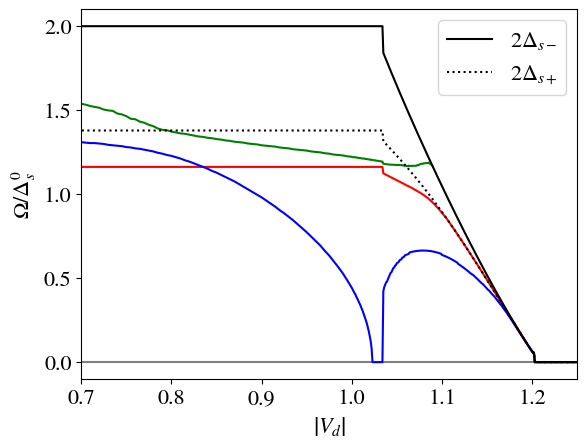

In [725]:
spectrum = np.load("./multigapSpectra/spectrum.npy")
c=["red","orange","pink","green"]
gapdata = np.load("./multigapValues/μ=-0.2,J=0.2,supp=0.1,N=1200,tol=1e-9.npy")
ηs = np.array([gapdata[1:3,0]]*200).transpose()
ηs = np.concatenate((ηs,gapdata[1:3,1:]),axis=1)
dwave = abs(gapdata[0,1:])
dwave = np.concatenate((np.linspace(0,1,200,endpoint=False),dwave))

plt.plot(dwave[:],spectrum[:,3]/ηs00,linestyle="solid",marker="",markersize=2,c="grey")
plt.plot(dwave[:],spectrum[:,0]/ηs00,linestyle="solid",marker="",markersize=2,c="r")
plt.plot(dwave[:],spectrum[:,1]/ηs00,linestyle="solid",marker="",markersize=2,c="b")
plt.plot(dwave[:290],spectrum[:290,2]/ηs00,linestyle="solid",marker="",markersize=2,c="g")
plt.plot(dwave,2*abs(ηs[0].transpose())/ηs00,c="black",label="2$\\Delta_{s-}$")
plt.plot(dwave,2*abs(ηs[1].transpose())/ηs00,c="black",label="2$\\Delta_{s+}$",linestyle="dotted")
plt.xlim((0.7,1.25))
#plt.ylim((-0.05,1.3))
plt.legend(loc="upper right")
plt.xlabel("$\\left|V_d\\right|$")
plt.ylabel("$\\Omega/\\Delta_s^0$")
#plt.savefig("./Plots/multigapSpectrum(zoom)_μ=-0.2,J=0.2,supp=0.1.pdf",bbox_inches="tight")

In [720]:
print(spectrum[315:,0]/ηs00)
print(dwave[235])
print(spectrum.shape)
print(gapdata.shape)
#spectrum[316:,0]= 2*abs(ηs[1,316:])
#spectrum[235:,[0,2]]=newmodes.transpose()
#np.save("./multigapSpectra/spectrum",spectrum)

[7.78685835e-01 7.70759362e-01 7.62808043e-01 7.54832365e-01
 7.46832736e-01 7.38809631e-01 7.30763537e-01 7.22694893e-01
 7.14604150e-01 7.06491800e-01 6.98358341e-01 6.90204209e-01
 6.82029906e-01 6.73835914e-01 6.65622718e-01 6.57390802e-01
 6.49140653e-01 6.40872734e-01 6.32587576e-01 6.24285642e-01
 6.15967396e-01 6.07633365e-01 5.99283989e-01 5.90919792e-01
 5.82541209e-01 5.74148741e-01 5.65742861e-01 5.57324041e-01
 5.48892751e-01 5.40449458e-01 5.31994599e-01 5.23528682e-01
 5.15051820e-01 5.06565373e-01 4.98068905e-01 4.89563154e-01
 4.81048560e-01 4.72525558e-01 4.63994580e-01 4.55456029e-01
 4.46910351e-01 4.38357964e-01 4.29799283e-01 4.21234719e-01
 4.12664653e-01 4.04089513e-01 3.95509700e-01 3.86925611e-01
 3.78337618e-01 3.69746139e-01 3.61151572e-01 3.52554287e-01
 3.43954709e-01 3.35353244e-01 3.26750279e-01 3.18145884e-01
 3.09541227e-01 3.00936803e-01 2.92332299e-01 2.83728639e-01
 2.75126354e-01 2.66526049e-01 2.57928421e-01 2.49334192e-01
 2.40744181e-01 2.321594

In [80]:
#for i in range(235,spectrum.shape[0]):
#    spectrum[i,0],spectrum[i,1]=spectrum[i,1],spectrum[i,0]

In [117]:
#np.save("multigapSpectra/spectrum",spectrum)

In [514]:
for i,vd in enumerate(dwave[380:]):
    print(i,vd)
    index = np.asarray(abs(gapdata[0])==vd).nonzero()[0][0]
    ηs = gapdata[1:3,index]
    ηd = gapdata[3:,index]
    ωmax = 2.25*np.min(abs(ηs))
    N=200
    cutoff = 0.5*ωmax
    Nω=100
    ωvals = np.linspace(cutoff,ωmax,Nω)
    bare,coll,VeffInv,Q,Qm = cnd.σ_bilayer(Vsarr,Vdarr,ηs+0j,ηd,ωvals,N=N,J=J,T=T,reg=1e-4j,qx=q,μ=μ,ωc=ωc)
    σ = bare[:,0,0]+coll[:,0,0]
    ind = np.argmax(σ)
    val = ωvals[ind]
    print(val)
    newspectrum[i+80]=val
    clear_output(wait=True)

69 1.249
(4, 4)
Interpreting ηs,ηd as complex amplitudes!
Momentum interval 1 of 1
Interpreting ηs,ηd as complex amplitudes!
Momentum interval 1 of 1
4.589843108055332e-08


In [2]:
###Finding the mode spectrum for μ=0,J=0.2,supp=0.1
μ=0
J=.2
supp=.1
q=0.001
Vs=1
ωc=20
arr = np.array([
    [1,supp],
    [supp,1]
])
gapdata = np.load("./multigapValues/μ=0,J=0.2,supp=0.1,N=1200,tol=1e-9.npy")
dwave = np.concatenate((np.linspace(0,0.9,180,endpoint=False),abs(gapdata[0])))
dwave[0]+=1e-10
newspectrum = []
for i,vd in enumerate(dwave[361:]):
    print(f"V_d ={vd}")
    if vd>=0.9:
        index = np.asarray(abs(gapdata[0])==vd).nonzero()[0][0]
        ηs = gapdata[1:3,index]
        ηd = gapdata[3:,index]
    else:
        ηs=gapdata[1:3,0]
        ηd=gapdata[3:,0]
    freq = bimo.symmetricModes(Vs*arr,vd*arr,ηs,ηd,N=200,reg=1e-4j,qx=q,μ=μ,ωc=ωc,J=J)
    n = len(freq)
    freq = np.append(freq,[0]*(4-n))
    newspectrum.append(freq)
    clear_output(wait=True)
newspectrum=np.array(newspectrum)

V_d =1.249
Momentum interval 1 of 1
Momentum interval 1 of 1


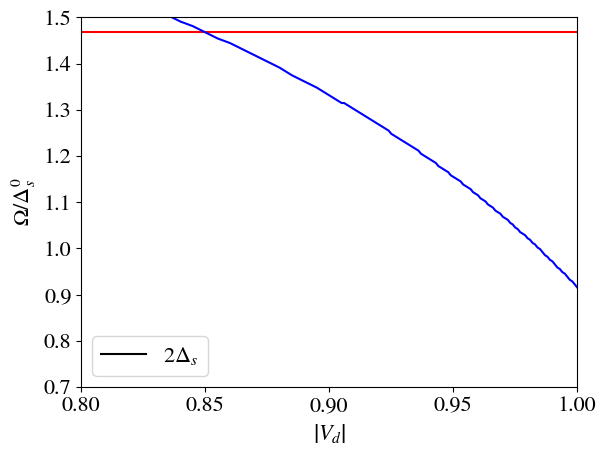

In [30]:
spec = np.load("./multigapSpectra/symmetricSpectrum.npy")
dwave,ηs = np.load("./multigapValues/μ=0,J=0.2,supp=0.1,N=1200,tol=1e-9.npy")[[0,1],:]
ηs = np.concatenate(([ηs00_1]*180,ηs))
dwave = np.concatenate((np.linspace(0,0.9,180,endpoint=False),dwave))
plt.plot(dwave[:392],spec[:392,0]/ηs00_1,linestyle="solid",marker="",markersize=2,c="r")
plt.plot(dwave[:472],spec[:472,1]/ηs00_1,linestyle="solid",marker="",markersize=2,c="b")
plt.plot(dwave[:381],spec[:381,2]/ηs00_1,linestyle="solid",marker="",markersize=2,c="g")
plt.plot(dwave,spec[:,3]/ηs00_1,linestyle="solid",marker="",markersize=2,c="grey")
plt.plot(dwave,2*ηs/ηs00_1,c="black",label="$2\\Delta_s$")
plt.xlim((0.8,1))
plt.ylim((0.7,1.5))
plt.xlabel("$\\left|V_d\\right|$")
plt.ylabel("$\\Omega/\\Delta_s^0$")
plt.legend()
#plt.savefig("./Plots/multigapSpectrumSymmetric.pdf",bbox_inches="tight")

In [65]:
#for i in range(360,len(dwave)):
#    spec[i,0],spec[i,1],spec[i,2]=spec[i,1],spec[i,2],spec[i,0]
#spec[454,0]=0.32824527*ηs00_1
#np.save("./multigapSpectra/symmetricSpectrum",spec)

In [62]:
print(spec[357:380]/ηs00_1)
print(dwave[360])

[[1.46092239 0.30828782 1.42250123 0.        ]
 [1.45944842 0.34030575 1.43091504 0.        ]
 [1.45777608 0.37164615 1.43894146 0.        ]
 [0.39920478 1.44969055 1.45590644 0.        ]
 [1.45243921 0.4254071  1.45787324 0.        ]
 [1.45142091 0.44806904 1.46487067 0.        ]
 [1.45018551 0.46754407 1.47148939 0.        ]
 [1.44609809 0.48918787 1.4803676  0.        ]
 [1.44445883 0.50509463 1.48620835 0.        ]
 [1.4426059  0.52317523 1.49167663 0.        ]
 [1.44054047 0.54079605 1.49677449 0.        ]
 [1.4382637  0.55542998 1.50150393 0.        ]
 [1.43577671 0.56966184 1.50586693 0.        ]
 [1.43308065 0.5810169  1.50986547 0.        ]
 [1.43017664 0.59447734 1.5135015  0.        ]
 [1.4270658  0.60511747 1.51677698 0.        ]
 [1.42135063 0.61781466 1.51969384 0.        ]
 [1.41785538 0.62774759 1.51988131 0.        ]
 [1.4141565  0.6373427  1.51976563 0.        ]
 [1.4102551  0.6466018  1.51934843 0.        ]
 [1.40615226 0.65552667 1.51863132 0.        ]
 [1.40184903 

0
550
0.5
750
0.8
750
1
783


(1.4, 1.5)

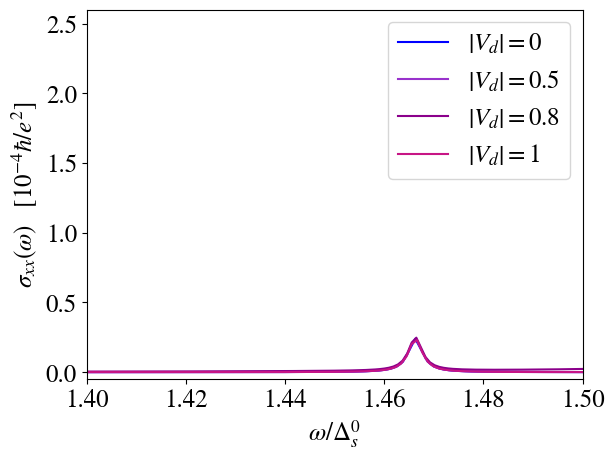

In [5]:
##Plotting some conductivities finally
μ=0
J=0.2
supp=.1
dwave = (0,0.5,0.8,1)
gapdata = np.load(f"./multigapValues/μ={μ},J={J},supp={supp},N=1200,tol=1e-9.npy")
conductivities=[]
gaps = []
colors=["blue","darkorchid","darkmagenta","mediumvioletred","red"]
for j,vd in enumerate(dwave):
    print(vd)
    N=1600
    if j==0: N=2400
    σ = np.load(f"././multigapConductivity/μ={μ},J={J},supp={supp}/σ,N={N},Vd={vd}.npy")
    ω = np.load(f"././multigapConductivity/μ={μ},J={J},supp={supp}/ω,N={N},Vd={vd}.npy")
    print(np.argmin(abs(ω/ηs00_1-2)))
    if vd<0.9:
        ηs = gapdata[1:3,0]
    else:
        index = np.asarray(gapdata[0,:]==vd).nonzero()[0][0]
        ηs=gapdata[1:3,index]
    gaps.append(ηs)
    conductivities.append(σ)
    plt.plot(ω/ηs00_1,1e4*σ,c=colors[j],label=f"$\\left|V_d\\right|={vd}$")
plt.plot([2]*2,[0,50],linestyle="dotted",color="black")
plt.ylim((-0.05,2.6))
plt.legend()
plt.ylabel("$\\sigma_{xx}(\\omega)\\quad[10^{-4}\\hbar/e^2]$")
plt.xlabel("$\\omega/\\Delta_s^0$")
plt.xlim((1.4,1.5))
#plt.savefig("./Plots/multibandConductivitiesSymmetric_swave(zoomed).pdf",bbox_inches='tight')

1.15
1.1
1.078


Text(0.5, 0, '$\\omega/\\Delta_s^0$')

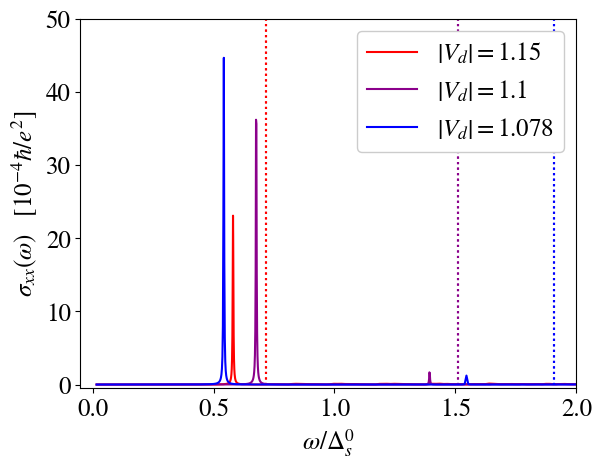

In [278]:
μ=0
J=0.2
supp=.1
dwave = (1.15,1.1,1.078)
gapdata = np.load(f"./multigapValues/μ={μ},J={J},supp={supp},N=1200,tol=1e-9.npy")
conductivities=[]
gaps = []
colors=["red","darkmagenta","blue"]
for j,vd in enumerate(dwave):
    print(vd)
    σ = np.load(f"././multigapConductivity/μ={μ},J={J},supp={supp}/σ,N=1600,Vd={vd}.npy")
    ω = np.load(f"././multigapConductivity/μ={μ},J={J},supp={supp}/ω,N=1600,Vd={vd}.npy")
    if vd<0.9:
        ηs = gapdata[1:3,0]
    else:
        index = np.asarray(gapdata[0,:]==vd).nonzero()[0][0]
        ηs=gapdata[1:3,index]
    gaps.append(ηs)
    conductivities.append(σ)
    plt.plot(ω/ηs00_1,1e4*σ,c=colors[j],label=f"$\\left|V_d\\right|={vd}$")
    plt.plot([2*ηs/ηs00_1]*2,[0,100],c=colors[j],linestyle="dotted")
plt.ylim((-0.5,50))
plt.xlim((-0.05,2))
plt.legend(framealpha=1)
plt.ylabel("$\\sigma_{xx}(\\omega)\\quad[10^{-4}\\hbar/e^2]$")
plt.xlabel("$\\omega/\\Delta_s^0$")
#plt.xlim((-0.5,2.25))
#plt.savefig("./Plots/multibandConductivitiesSymmetric_s+id-wave.pdf",bbox_inches='tight')

1.03


Text(0.5, 0, '$\\omega/\\Delta_s^0$')

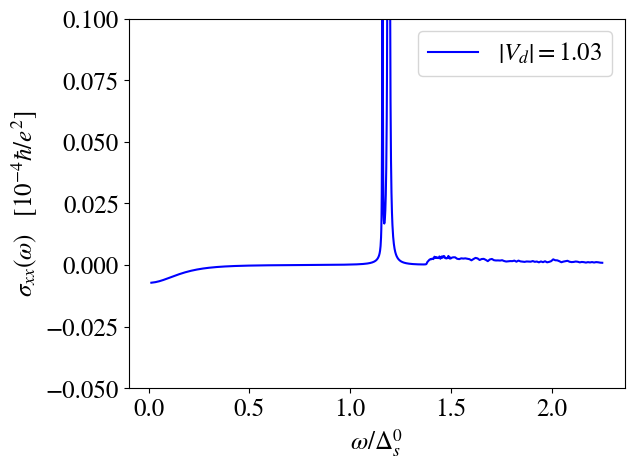

In [282]:
##Plotting some conductivities finally
μ=-0.2
J=0.2
supp=.1
dwave = (1.03,)
gapdata = np.load(f"./multigapValues/μ={μ},J={J},supp={supp},N=1200,tol=1e-9.npy")
conductivities=[]
gaps = []
colors=["blue","darkmagenta","red","red"]
for j,vd in enumerate(dwave):
    print(vd)
    σ = np.load(f"././multigapConductivity/μ={μ},J={J},supp={supp}/σ,N=1600,Vd={vd}.npy")
    ω = np.load(f"././multigapConductivity/μ={μ},J={J},supp={supp}/ω,N=1600,Vd={vd}.npy")
    if vd<0.9:
        ηs = gapdata[1:3,0]
    else:
        index = np.asarray(gapdata[0,:]==vd).nonzero()[0][0]
        ηs=gapdata[1:3,index]
    gaps.append(ηs)
    conductivities.append(σ)
    plt.plot(ω/ηs00,1e4*σ,c=colors[j],label=f"$\\left|V_d\\right|={vd}$")
plt.ylim((-0.05,0.1))
plt.legend()
plt.ylabel("$\\sigma_{xx}(\\omega)\\quad[10^{-4}\\hbar/e^2]$")
plt.xlabel("$\\omega/\\Delta_s^0$")
#plt.xlim((-0.5,2.25))
#plt.savefig("./Plots/multibandConductivityμ=-0.2_swave_Vd=1.03.pdf",bbox_inches='tight')

0.001


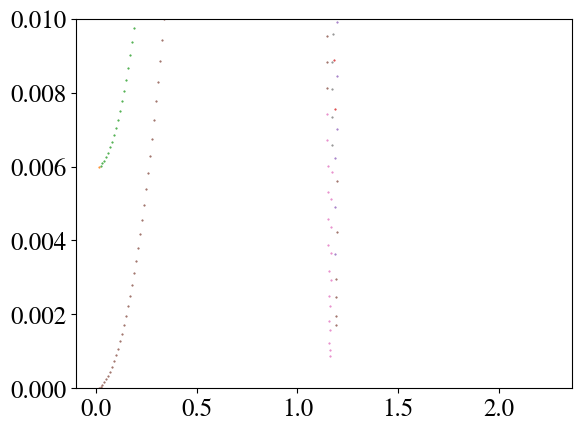

In [291]:
VeffInvtest = np.load(f"././multigapConductivity/μ={μ},J={J},supp={supp}/VeffInv,N=1600,Vd={vd}.npy")
λ,vecs = np.linalg.eig(VeffInvtest)
plt.plot(ω/ηs00,abs(λ),linestyle="None",marker=".",ms=1)
plt.ylim((0,0.01))
print(ω[0])

0
0.5
1.02


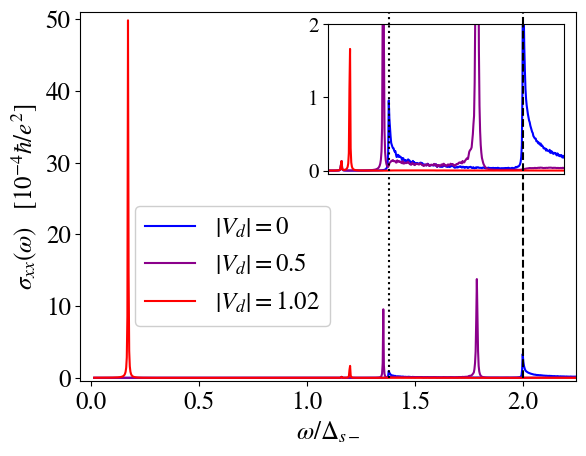

In [275]:
μ=-0.2
J=0.2
supp=.1
dwave = (0,0.5,1.02)
gapdata = np.load(f"./multigapValues/μ={μ},J={J},supp={supp},N=1200,tol=1e-9.npy")
conductivities=[]
gaps = []
colors=["blue","darkmagenta","red"]
fig,ax = plt.subplots()
insax = inset_axes(ax,
                    width="47.5%", # width = 30% of parent_bbox
                    height=1.5, # height : 1 inch
                    loc="upper right")
for j,vd in enumerate(dwave):
    print(vd)
    σ = np.load(f"././multigapConductivity/μ={μ},J={J},supp={supp}/σ,N=1600,Vd={vd}.npy")
    ω = np.load(f"././multigapConductivity/μ={μ},J={J},supp={supp}/ω,N=1600,Vd={vd}.npy")
    if vd<0.9:
        ηs = gapdata[1:3,0]
    else:
        index = np.asarray(gapdata[0,:]==vd).nonzero()[0][0]
        ηs=gapdata[1:3,index]
    gaps.append(ηs)
    conductivities.append(σ)
    ax.plot(ω/ηs00,1e4*σ,c=colors[j],label=f"$\\left|V_d\\right|={vd}$")
    insax.plot(ω/ηs00,1e4*σ,c=colors[j],label=f"$\\left|V_d\\right|={vd}$")
ax.set_ylim((-0.5,51))
ax.set_xlim((-0.05,2.25))
ax.plot([2,2],[0,51],linestyle="dashed",c="black")
ax.plot([2*ηs01/ηs00]*2,[0,51],linestyle="dotted",c="black")
insax.set_ylim((-0.05,2))
insax.set_xlim((1.1,2.19))
insax.set_xticks([])
insax.plot([2,2],[0,51],linestyle="dashed",c="black")
insax.plot([2*ηs01/ηs00]*2,[0,51],linestyle="dotted",c="black")
ax.legend(loc=(0.11,0.15),framealpha=0.95)
ax.set_ylabel("$\\sigma_{xx}(\\omega)\\quad[10^{-4}\\hbar/e^2]$")
ax.set_xlabel("$\\omega/\\Delta_{s-}$")
for item in insax.get_yticklabels():
    item.set_fontsize(15)
#plt.savefig("./Plots/multibandConductivitiesμ=-0.2_swave.pdf",bbox_inches="tight")

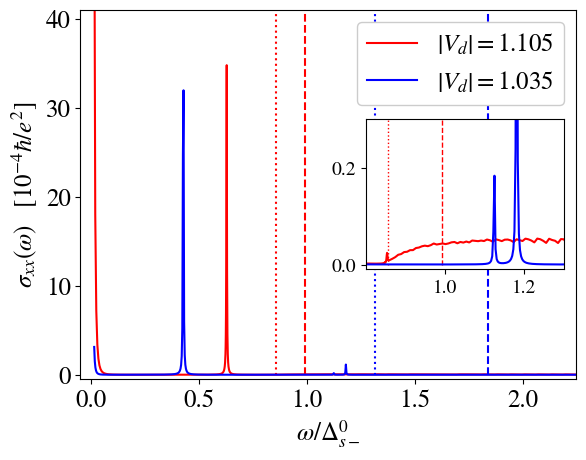

In [219]:
μ=-0.2
J=0.2
supp=.1
dwave = (1.105,1.035)
col=("red","blue")
gapdata = np.load(f"./multigapValues/μ={μ},J={J},supp={supp},N=1200,tol=1e-9.npy")
fig, ax = plt.subplots()
insax = inset_axes(ax,
                    width="40%", # width = 30% of parent_bbox
                    height=1.5, # height : 1 inch
                    loc="center right")#
for j,vd in enumerate(dwave):
    σ = np.load(f"././multigapConductivity/μ={μ},J={J},supp={supp}/σ,N=4800,Vd={vd}.npy")
    ω = np.load(f"././multigapConductivity/μ={μ},J={J},supp={supp}/ω,N=4800,Vd={vd}.npy")
    #σ[:]*=30
    index = np.asarray(gapdata[0,:]==vd).nonzero()[0][0]
    ηs=abs(gapdata[1:3,index])
    ηd=abs(gapdata[3:,index])
    ax.plot(ω/ηs00,1e4*σ,c=col[j],label=f"$\\left|V_d\\right|={vd}$",marker="")
    ax.plot([2*ηs[0]/ηs00]*2,[0,100],c=col[j],linestyle="dashed")
    ax.plot([2*ηs[1]/ηs00]*2,[0,100],c=col[j],linestyle="dotted")
    insax.plot(ω/ηs00,1e4*σ,c=col[j],label=f"$\\left|V_d\\right|={vd}$",marker="")
    insax.plot([2*ηs[0]/ηs00]*2,[0,100],c=col[j],linestyle="dashed",linewidth=1)
    insax.plot([2*ηs[1]/ηs00]*2,[0,100],c=col[j],linestyle="dotted",linewidth=1)
ax.set_ylim((-0.5,41))
ax.set_xlim((-0.05,2.25))
ax.legend(framealpha=1)
ax.set_ylabel("$\\sigma_{xx}(\\omega)\\quad[10^{-4}\\hbar/e^2]$")
ax.set_xlabel("$\\omega/\\Delta_{s-}^0$")
insax.set_ylim((-0.01,0.3))
insax.set_xlim((0.8,1.3))
insax.set_xticks([1,1.2])
for item in insax.get_yticklabels()+insax.get_xticklabels():
    item.set_fontsize(14)
#plt.savefig(f"./Plots/multibandConductivities,μ={μ}s+id-wave.pdf",bbox_inches="tight")

In [110]:
VeffInv = np.load(f"./multigapConductivity/μ={μ},J={J},supp={supp}/VeffInv,N=4800,Vd={1.105}.npy")
ωarr = np.load(f"././multigapConductivity/μ={μ},J={J},supp={supp}/ω,N=4800,Vd={1.105}.npy")
λ,vecs = np.linalg.eig(VeffInv)
low = 150
up = low+200
print(f"Checking frequencies from {ω[low]/ηs00:.3f} to {ω[up]/ηs00:.3f}")
getinterBandModes(λ,vecs,ω/ηs00,cutoff=3e-4,indexrange=(low,up),rounding=4)

Checking frequencies from 0.542 to 0.708
Eigenvalue 102 at ω = 0.6267 is: 
0.0002757
And the mode is: 
Band 1: 0.6773+0j s, -0.0426-0.0058j d,0.0877+0.0066j is, 0.3297-0.0003j id
Band 2: 0.5506-0.0021j s, -0.0432-0.0146j d,0.0712+0.025j is, 0.3346-0.0011j id

Eigenvalue 103 at ω = 0.6275 is: 
0.0002136
And the mode is: 
Band 1: 0.6772+0j s, -0.0426-0.0059j d,0.0876+0.0066j is, 0.3297-0.0003j id
Band 2: 0.5507-0.0021j s, -0.0432-0.0147j d,0.0712+0.0251j is, 0.3348-0.0011j id

Eigenvalue 104 at ω = 0.6283 is: 
0.0002128
And the mode is: 
Band 1: 0.677+0j s, -0.0426-0.0059j d,0.0876+0.0066j is, 0.3296-0.0003j id
Band 2: 0.5509-0.0021j s, -0.0433-0.0147j d,0.0712+0.0251j is, 0.3349-0.0011j id

Eigenvalue 105 at ω = 0.6292 is: 
0.0002744
And the mode is: 
Band 1: 0.6769+0j s, -0.0426-0.0059j d,0.0876+0.0066j is, 0.3296-0.0003j id
Band 2: 0.551-0.0021j s, -0.0433-0.0147j d,0.0712+0.0251j is, 0.335-0.0011j id



(0.0, 0.01)

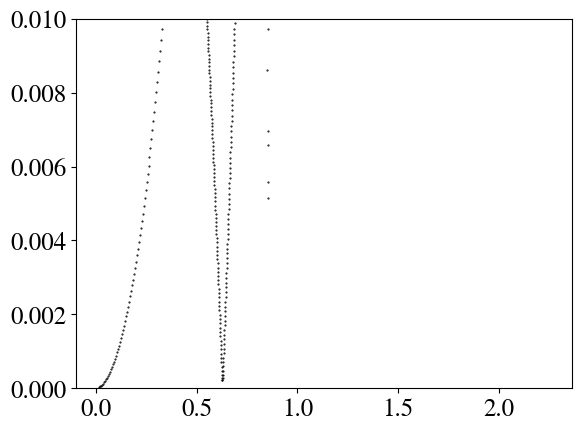

In [113]:
plt.plot(ωarr/ηs00,abs(λ),c="black",linestyle="None",marker=".",ms=1)
plt.ylim((0,0.01))

In [87]:
eig = abs(λ[380:430,:])
ωarray = ω[380:430]
modes = vecs[380:430,...]
print(eig[37])
print()
for comp in modes[37,:,-1]:
    print(np.round(comp,4))

[0.27895578 0.45568555 0.19407367 0.41512797 0.26655958 0.19502081
 0.0355185  0.00150426]

(0.0736+0.0009j)
(-0.307-0.0114j)
(-0.5778-0.0129j)
(-0.0403+0.0401j)
(-0.0923-0.0752j)
(0.1409+0.0015j)
(0.7271+0j)
(0.0182+0j)


In [105]:
a = np.random.rand(4,4,4)
b= a[1:3,...]
b.shape

(2, 4, 4)